In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division, print_function

In [2]:
def plot_polynomial(xmin, xmax, coef,
                    yfunc=(lambda y:y),
                    color='C1'):
    """Plot a polynomial with coefficients given in coef,
    optionally apply a function `yfunc` to the y values."""
    #xs is an array of evenly spaced numbers between xmin and xmax
    xs = np.linspace(xmin, xmax, num=500)
    
    #ys is an array, each element is computed as a polynomial function of
    #the corresponding element of xs
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, yfunc(ys), color=color)

## Example:

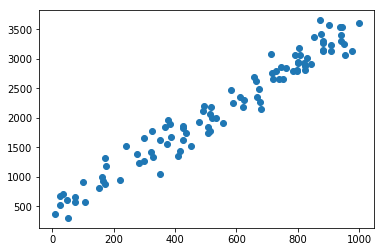

In [3]:
# generate x,y where x and y are 
m = 100
x = np.random.uniform(0, 10, size=m)
y = 3*x  + 5 + np.random.normal(scale=2.0, size=m)

x = 100*x
y = 100*y

# plot
plt.scatter(x,y)
plt.show()

In [4]:
# make the X matrix
X = np.concatenate([a.reshape([m,1]) for a in [np.ones_like(x), x]],
                  axis=1)
n = X.shape[1]
print('first 3 rows of X:')
print(X[:3])

first 3 rows of X:
[[  1.         505.89728952]
 [  1.         107.07779269]
 [  1.         824.62013962]]


In [5]:
def grad(X, y, theta, m):
    g = (1/m) * X.T.dot(X.dot(theta) - y.reshape([m,1]))
    return g.reshape(theta.shape)

In [6]:
# initialize theta
theta = np.random.normal(size=n).reshape([n,1])
theta

array([[-0.10991452],
       [-0.55612433]])

[[2.64896453]
 [3.73824764]]


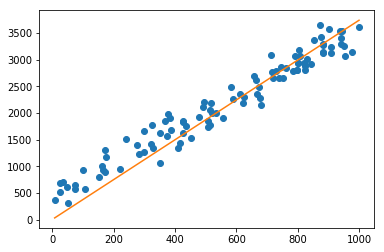

In [7]:
#Gradient descent for a number of steps:
alpha = 0.000001 #learning rate
for i in range(30000):
    g = grad(X, y, theta, m)
    theta = theta - alpha*g
print(theta)
plt.scatter(x,y)
plot_polynomial(x.min(), x.max(), theta)
plt.show()

Conclusion: learning rate is dependent on the scale of `x` and `y`. Very fiddly when `x`, `y` large.

## Standardizing

We want an algorithm that's not dependent on the scale of `x, y`.

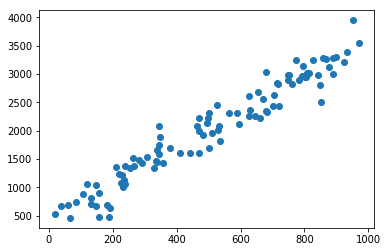

In [8]:
# generate x,y where x and y are 
m = 100
x = np.random.uniform(0, 10, size=m)
y = 3*x  + 5 + np.random.normal(scale=2.0, size=m)

x = 100*x
y = 100*y

# plot
plt.scatter(x,y)
plt.show()

In [9]:
mx, sx = x.mean(), x.std()
mx, sx

(503.8946710262919, 266.17010291046415)

In [10]:
import seaborn as sns

In [11]:
x_scaled = (x - mx) / sx

In [12]:
x_scaled.mean(), x_scaled.std()

(-2.2648549702353194e-16, 0.9999999999999998)

In [13]:
my, sy = y.mean(), y.std()
y_scaled = (y - my) / sy

In [14]:
# make matrix X after scaling each feature
X_scaled = np.concatenate([
    a.reshape([m,1]) for a in [np.ones_like(x_scaled), x_scaled]],
    axis=1)
X_scaled[:3]

array([[ 1.        ,  1.12822855],
       [ 1.        , -0.63429179],
       [ 1.        , -0.89115279]])

In [15]:
theta = np.random.normal(size=n).reshape([n,1])

[[-1.10993910e-16]
 [ 9.69222942e-01]]


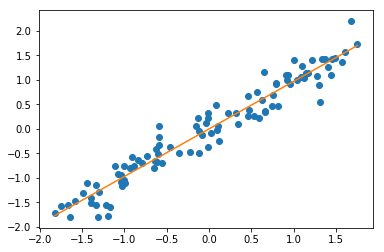

In [16]:
#Gradient descent for a number of steps:
alpha = 0.01 #learning rate
for i in range(30000):
    g = grad(X_scaled, y_scaled, theta, m)
    theta = theta - alpha*g
print(theta)
plt.scatter(X_scaled[:,1],y_scaled)
plot_polynomial(X_scaled[:,1].min(), X_scaled[:,1].max(), theta)
plt.show()

In [17]:
x_in = 600
x_in_scaled = (x_in - mx) / sx
X_in_scaled = np.array([[1, x_in_scaled]])
y_pred_scaled = X_in_scaled.dot(theta) # Use model theta
y_pred = (y_pred_scaled * sy) + my
y_pred

array([[2334.95370173]])

$$\LARGE
        \begin{array}{ccc}
            X &  & Y \\
            \downarrow &  & \updownarrow \\
            X_{scaled} & \stackrel{h_\theta}{\rightarrow} & Y_{scaled} 
        \end{array}
$$

In [18]:
# Use this for convenience
from sklearn.preprocessing import StandardScaler

## Note:
- Should not standardize binary features (features with values only `0,1`)
- Sometimes scaling to `[0.0, 1.0]` is preferred over standardizing to mean `0`, stdev `1`. Do this when the (positive) sign of the feature is important. ( Example: pixel values. )
